In [5]:
! explorer .

In [ ]:
Xsec_point.xlsx

## 断面を作る

### 断面ファイルのサンプル
https://github.com/OpenVSP/OpenVSP のTestXSec.fxs

In [ ]:
OPENVSP_XSEC_FILE_V1
1.0  0.0
0.0  -1.0
-1.0   0.0
0.0   1.0
1.0  0.0

**注意**
1. X軸上のプラスの点から始めること
1. 時計回り
1. クローズするように点作成
1. 点間距離が細かすぎると、エラーを起こす

## GUI 断面ファイルの読み込み
動画参照

## python API

おまじない

In [1]:
"""Test the OpenVSP Python Interface."""
%matplotlib inline
from __future__ import print_function

import vsp as vsp
import numpy as np
import pandas as pd

def angle_between(refvec):
    origin=[0,0]
    ang1 = np.arctan2(*origin[::-1])
    ang2 = np.arctan2(*refvec[::-1])
    return np.rad2deg((ang1 - ang2) % (2 * np.pi))

stdout = vsp.cvar.cstdout
errorMgr = vsp.ErrorMgrSingleton_getInstance()

input 断面

,0,1
0,0.800000,0.000000
1,0.570244,-0.179091
2,0.624410,-1.190968
3,0.429874,-0.840401
4,-0.584389,-0.902776
5,-0.743764,0.381409
6,0.800000,0.000000


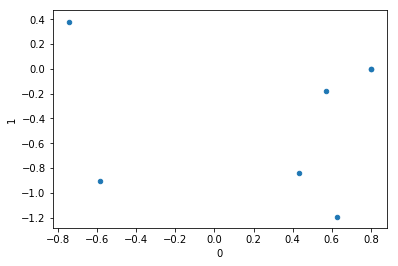

In [2]:
start_and_end_point = [0.8,0]
point = np.random.randn(5,2)
point = np.insert(point,0,start_and_end_point,axis=0)
pnt=point.tolist()
pnt = sorted(pnt, key=angle_between)
pnt.append(start_and_end_point)
df = pd.DataFrame(pnt)
df.plot(kind='scatter', x=0, y=1)
df

中身

In [3]:

# ==== Use Case 2 ====#

vsp.VSPRenew()
errorMgr.PopErrorAndPrint(stdout)

geoms = vsp.FindGeoms()

print("All geoms in Vehicle.")
print(geoms)

# Add Fuse
fuse_id = vsp.AddGeom("FUSELAGE")

# Get XSec Surf ID
xsurf_id = vsp.GetXSecSurf(fuse_id, 0)

# Change Type of First XSec
vsp.ChangeXSecShape(xsurf_id, 0, vsp.XS_SUPER_ELLIPSE)
errorMgr.PopErrorAndPrint(stdout)

# Change Type First XSec Properties
xsec_id = vsp.GetXSec(xsurf_id, 0)
width_id = vsp.GetXSecParm(xsec_id, "Super_Width")
height_id = vsp.GetXSecParm(xsec_id, "Super_Height")
vsp.SetParmVal(width_id, 4.0)
vsp.SetParmVal(height_id, 2.0)

# Copy Cross-Section to Clipboard
vsp.CopyXSec(fuse_id, 0)

# Paste Cross-Section
vsp.PasteXSec(fuse_id, 1)
vsp.PasteXSec(fuse_id, 2)
vsp.PasteXSec(fuse_id, 3)

# Change Type to File XSec

vsp.ChangeXSecShape(xsurf_id, 0, vsp.XS_FILE_FUSE)
file_xsec_id = vsp.GetXSec(xsurf_id, 0)

# Build Point Vec
pnt_vec = vsp.Vec3dVec() 
for vec in pnt:
    pnt_vec.push_back(vsp.vec3d(vec[0], vec[1], 0.0)) 
# pnt_vec = vsp.Vec3dVec() 
# pnt_vec.push_back(vsp.vec3d(1.0, 0.0, 0.0)) 
# pnt_vec.push_back(vsp.vec3d(0.0, -2.0, 0.0)) 
# pnt_vec.push_back(vsp.vec3d(-1.0, 0.0, 0.0)) 
# pnt_vec.push_back(vsp.vec3d(0.0, 2.0, 0.0)) 
# pnt_vec.push_back(vsp.vec3d(1.0, 0.0, 0.0)) 

# Load Points Into XSec
vsp.SetXSecPnts(file_xsec_id, pnt_vec)

All geoms in Vehicle.
()


最後のおまじない

In [4]:
geoms = vsp.FindGeoms()

print("End of second use case, all geoms in Vehicle.")
print(geoms)

vsp.WriteVSPFile("apitest2.vsp3")

# Check for errors

num_err = errorMgr.GetNumTotalErrors()
for i in range(0, num_err):
    err = errorMgr.PopLastError()
    print("error = ", err.m_ErrorString)

End of second use case, all geoms in Vehicle.
('CKMPJCJTRB',)


これで "apitest2.vsp3"が出来上がって、Fuselageができあがる

## working

- 複数の断面をdfに入れる
- 各々の断面を表示
- 断面のスパンを設定
- vspファイルを作成